In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Embedding

In [23]:
df= pd.read_csv('../data_clean/merged_total_no_keyphrases.csv')
df.head()

,financieledata_toegevoegde_waarde,financieledata_boekjaar_range,functie_naam,account_adres,account_onderneming,contact_contactpersoon_id,contact_functietitel,persoon_mail_thema_duurzaamheid,persoon_mail_thema_financieel_fiscaal,persoon_mail_thema_innovatie,...,visit_exit_page,visit_first_visit,visit_operating_system,visit_referring_host,visit_referrer_type,visit_total_pages,anonymous_visitor,sentemail_kliks_clicks,mailing_name,mailing_onderwerp
0,413465.00,5.0,medewerker,melle gent,"familiebedrijf, diensten, vastgoed",D9303EA2-57E5-EB11-8121-001DD8B72B61,NaN,0.0,0.0,0.0,...,unknown,-1.0,unknown,unknown,unknown,-1.0,-1.0,-1.0,unknown,unknown
1,494107.00,9.0,contact lidmaatschap bedrijfsleider,geraardsbergen aalst,"bedrijf, diensten, consultancy",451DF235-4B73-E111-B43A-00505680000A,zaakvoerder,0.0,0.0,0.0,...,unknown,-1.0,unknown,unknown,unknown,-1.0,-1.0,-1.0,unknown,unknown
2,1687010.57,3.0,contact lidmaatschap bedrijfsleider,meilegem oudenaarde,"bedrijf, diensten, milieu",10446D11-F363-ED11-9561-6045BD895B5A,ownermanager,1.0,1.0,1.0,...,activiteiten nieuwjaarsreceptie gent,0.0,WINDOWS,unknown,mail,9.0,-1.0,53.0,nw nieuwjaarsreceptie 2023 gent,nieuwjaarsreceptie gent voka oost vlaanderen
3,1687010.57,3.0,contact lidmaatschap bedrijfsleider,meilegem oudenaarde,"bedrijf, diensten, milieu",10446D11-F363-ED11-9561-6045BD895B5A,ownermanager,1.0,1.0,1.0,...,activiteiten nieuwjaarsreceptie vlaamse ardennen,0.0,WINDOWS,unknown,mail,1.0,-1.0,18.0,nw nieuwjaarsreceptie vlaamse ardennen leiestr...,nieuwjaarsreceptie vlaamse ardennen leiestreek...
4,1687010.57,3.0,contact lidmaatschap bedrijfsleider,meilegem oudenaarde,"bedrijf, diensten, milieu",10446D11-F363-ED11-9561-6045BD895B5A,ownermanager,1.0,1.0,1.0,...,activiteiten financieel management voor niet f...,0.0,WINDOWS,unknown,mail,1.0,-1.0,136.0,nieuwsbrief 09052023,nieuws van voka oost vlaanderen rechtstreeks i...


In [24]:
df.shape

(267645, 57)

In [25]:
df.columns

Index(['financieledata_toegevoegde_waarde', 'financieledata_boekjaar_range',
       'functie_naam', 'account_adres', 'account_onderneming',
       'contact_contactpersoon_id', 'contact_functietitel',
       'persoon_mail_thema_duurzaamheid',
       'persoon_mail_thema_financieel_fiscaal', 'persoon_mail_thema_innovatie',
       'persoon_mail_thema_internationaal_ondernemen',
       'persoon_mail_thema_mobiliteit', 'persoon_mail_thema_omgeving',
       'persoon_mail_thema_sales_marketing_communicatie',
       'persoon_mail_thema_strategie_en_algemeen_management',
       'persoon_mail_thema_talent', 'persoon_mail_thema_welzijn',
       'persoon_mail_type_bevraging',
       'persoon_mail_type_communities_en_projecten',
       'persoon_mail_type_netwerkevenementen',
       'persoon_mail_type_nieuwsbrieven', 'persoon_mail_type_opleidingen',
       'persoon_mail_type_persberichten_belangrijke_meldingen',
       'persoon_marketingcommunicatie', 'activiteitscode_naam',
       'afspraak_thema', 

In [26]:
df['afspraak_keyphrases'].head()

0                                              unknown
1                                              unknown
2    voedingsindustrie,rest,interes,fiscal,afvalstr...
3    voedingsindustrie,rest,interes,fiscal,afvalstr...
4    voedingsindustrie,rest,interes,fiscal,afvalstr...
Name: afspraak_keyphrases, dtype: object

In [27]:
df.drop_duplicates
df.shape

(267645, 57)

In [27]:
import pandas as pd
import spacy
import numpy as np  
# Load the spaCy pre-trained Word2Vec model
#nlp_en = spacy.load("en_core_web_md")
nlp_nl = spacy.load("nl_core_news_sm")

# Create a sample DataFrame
sentence = 'I,love,data,science'

# Define a function to get the Word2Vec vector for a keyphrase
def embed_sentence(sentence):
    data= []
    print(sentence)
    for word in sentence.split(',') :
        print(word)
        doc = nlp_nl(word)
        print(np.mean(doc.vector))
        data.append(np.mean(doc.vector))
    return data

def embedding_model(df_clean, cat_cols=cat_cols):
    df_copy = df_clean.copy()
    for col in cat_cols:
        for row in range(len(df_copy)):
            df_copy.at[row, col] = embed_sentence(df_copy[col][row])
    return df_copy



In [28]:
embed_sentence(sentence)

I,love,data,science
I
-0.0066212765
love
-0.026411772
data
0.012295465
science
-0.032776237
[-0.0066212765, -0.026411772, 0.012295465, -0.032776237]


duurt 157 min (4cores) #rip

In [37]:
df_embed = embedding_model(df_clean=df_clean, cat_cols=cat_cols)

In [38]:
df_embed.head()

,financieledata_toegevoegde_waarde,financieledata_boekjaar_range,afspraak_keyphrases,afspraak_betreft,afspraak_account_gelinkt,account_keyphrases,inschrijving_aanwezig_afwezig,inschrijving_bron,inschrijving_facturatie_bedrag,campagne_keyphrases,sessie_keyphrases,visit_bounce,visit_duration,visit_first_visit,visit_total_pages,visit_keyphrases,visit_bouce,sentemail_kliks_clicks,mailing_keyphrases
0,413465.00,5.0,0.013675,-1.0,-1.0,-0.009223,1,1,50.0,-0.008486,-0.006258,unknown,-1.0,-1.0,-1.0,0.013675,-1,-1.0,0.013675
1,494107.00,9.0,0.013675,-1.0,-1.0,-0.003056,1,1,0.0,-0.004275,-0.010647,unknown,-1.0,-1.0,-1.0,0.013675,-1,-1.0,0.013675
2,1687010.57,3.0,-0.007187,2.0,1.0,-0.000462,1,1,0.0,-0.003388,-0.004251,Ja,0.0,0.0,1.0,-0.010881,1,52.0,0.002856
3,1687010.57,3.0,-0.007187,2.0,1.0,-0.000462,1,1,0.0,-0.003388,-0.004251,Ja,0.0,0.0,1.0,-0.011375,1,18.0,-0.004773
4,1687010.57,3.0,-0.007187,2.0,1.0,-0.000462,1,1,0.0,-0.003388,-0.004251,Ja,0.0,0.0,1.0,-0.016026,1,136.0,-0.006436


In [39]:
if os.path.exists('../data_clean/rec_system_embedded.csv'):
    os.remove('../data_clean/rec_system_embedded.csv')
df_embed.to_csv('../data_clean/rec_system_embedded.csv', index=False)

### preprocessing

In [28]:
import pandas as pd
df_embed = pd.read_csv('../data_clean/rec_system_embedded.csv')

In [4]:
#change dtype to float
df_embed["account_keyphrases"] = df_embed["account_keyphrases"].astype(float)
df_embed["sessie_keyphrases"] = df_embed["sessie_keyphrases"].astype(float)
df_embed["visit_keyphrases"] = df_embed["visit_keyphrases"].astype(float)
df_embed["mailing_keyphrases"] = df_embed["mailing_keyphrases"].astype(float)
df_embed["campagne_keyphrases"] = df_embed["campagne_keyphrases"].astype(float)

In [29]:
df_embed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250666 entries, 0 to 250665
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   financieledata_toegevoegde_waarde  250666 non-null  float64
 1   financieledata_boekjaar_range      250666 non-null  float64
 2   afspraak_keyphrases                250666 non-null  float64
 3   afspraak_betreft                   250666 non-null  float64
 4   afspraak_account_gelinkt           250666 non-null  float64
 5   account_keyphrases                 250666 non-null  float64
 6   inschrijving_aanwezig_afwezig      250666 non-null  int64  
 7   inschrijving_bron                  250666 non-null  int64  
 8   inschrijving_facturatie_bedrag     250666 non-null  float64
 9   campagne_keyphrases                250666 non-null  float64
 10  sessie_keyphrases                  250666 non-null  float64
 11  visit_bounce                       2506

In [31]:
category_cols = df_embed.select_dtypes(include=['object']).columns
print("categorical cols: ",category_cols)
numeric_cols = df_embed.select_dtypes(include=['float64']).columns
print("numerical cols : ", numeric_cols)

categorical cols:  Index(['visit_bounce'], dtype='object')
numerical cols :  Index(['financieledata_toegevoegde_waarde', 'financieledata_boekjaar_range',
       'afspraak_keyphrases', 'afspraak_betreft', 'afspraak_account_gelinkt',
       'account_keyphrases', 'inschrijving_facturatie_bedrag',
       'campagne_keyphrases', 'sessie_keyphrases', 'visit_duration',
       'visit_first_visit', 'visit_total_pages', 'visit_keyphrases',
       'sentemail_kliks_clicks', 'mailing_keyphrases'],
      dtype='object')


In [32]:
df_embed.head()

,financieledata_toegevoegde_waarde,financieledata_boekjaar_range,afspraak_keyphrases,afspraak_betreft,afspraak_account_gelinkt,account_keyphrases,inschrijving_aanwezig_afwezig,inschrijving_bron,inschrijving_facturatie_bedrag,campagne_keyphrases,sessie_keyphrases,visit_bounce,visit_duration,visit_first_visit,visit_total_pages,visit_keyphrases,visit_bouce,sentemail_kliks_clicks,mailing_keyphrases
0,413465.00,5.0,0.013675,-1.0,-1.0,-0.009223,1,1,50.0,-0.008486,-0.006258,unknown,-1.0,-1.0,-1.0,0.013675,-1,-1.0,0.013675
1,494107.00,9.0,0.013675,-1.0,-1.0,-0.003056,1,1,0.0,-0.004275,-0.010647,unknown,-1.0,-1.0,-1.0,0.013675,-1,-1.0,0.013675
2,1687010.57,3.0,-0.007187,2.0,1.0,-0.000462,1,1,0.0,-0.003388,-0.004251,Ja,0.0,0.0,1.0,-0.010881,1,52.0,0.002856
3,1687010.57,3.0,-0.007187,2.0,1.0,-0.000462,1,1,0.0,-0.003388,-0.004251,Ja,0.0,0.0,1.0,-0.011375,1,18.0,-0.004773
4,1687010.57,3.0,-0.007187,2.0,1.0,-0.000462,1,1,0.0,-0.003388,-0.004251,Ja,0.0,0.0,1.0,-0.016026,1,136.0,-0.006436


In [33]:
df_embed["visit_bouce"].value_counts()

visit_bouce
 1    118026
 0    105823
-1     26817
Name: count, dtype: int64

In [34]:
df_embed.drop(columns=['visit_bounce'], inplace=True)

In [35]:
df_embed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250666 entries, 0 to 250665
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   financieledata_toegevoegde_waarde  250666 non-null  float64
 1   financieledata_boekjaar_range      250666 non-null  float64
 2   afspraak_keyphrases                250666 non-null  float64
 3   afspraak_betreft                   250666 non-null  float64
 4   afspraak_account_gelinkt           250666 non-null  float64
 5   account_keyphrases                 250666 non-null  float64
 6   inschrijving_aanwezig_afwezig      250666 non-null  int64  
 7   inschrijving_bron                  250666 non-null  int64  
 8   inschrijving_facturatie_bedrag     250666 non-null  float64
 9   campagne_keyphrases                250666 non-null  float64
 10  sessie_keyphrases                  250666 non-null  float64
 11  visit_duration                     2506

In [36]:
df_embed.head()

,financieledata_toegevoegde_waarde,financieledata_boekjaar_range,afspraak_keyphrases,afspraak_betreft,afspraak_account_gelinkt,account_keyphrases,inschrijving_aanwezig_afwezig,inschrijving_bron,inschrijving_facturatie_bedrag,campagne_keyphrases,sessie_keyphrases,visit_duration,visit_first_visit,visit_total_pages,visit_keyphrases,visit_bouce,sentemail_kliks_clicks,mailing_keyphrases
0,413465.00,5.0,0.013675,-1.0,-1.0,-0.009223,1,1,50.0,-0.008486,-0.006258,-1.0,-1.0,-1.0,0.013675,-1,-1.0,0.013675
1,494107.00,9.0,0.013675,-1.0,-1.0,-0.003056,1,1,0.0,-0.004275,-0.010647,-1.0,-1.0,-1.0,0.013675,-1,-1.0,0.013675
2,1687010.57,3.0,-0.007187,2.0,1.0,-0.000462,1,1,0.0,-0.003388,-0.004251,0.0,0.0,1.0,-0.010881,1,52.0,0.002856
3,1687010.57,3.0,-0.007187,2.0,1.0,-0.000462,1,1,0.0,-0.003388,-0.004251,0.0,0.0,1.0,-0.011375,1,18.0,-0.004773
4,1687010.57,3.0,-0.007187,2.0,1.0,-0.000462,1,1,0.0,-0.003388,-0.004251,0.0,0.0,1.0,-0.016026,1,136.0,-0.006436


standardscaller

In [47]:
scaling_cols = df_embed[["financieledata_toegevoegde_waarde", "sentemail_kliks_clicks"]]
scaling_cols.head()

,financieledata_toegevoegde_waarde,sentemail_kliks_clicks
0,413465.00,-1.0
1,494107.00,-1.0
2,1687010.57,52.0
3,1687010.57,18.0
4,1687010.57,136.0


In [56]:
from sklearn.preprocessing import StandardScaler

def standardize(df, numeric_cols):
    df_copy = df.copy()
    scaler = StandardScaler()
    for col in numeric_cols:
        col_data = df_copy[[col]]
        scaled_data = scaler.fit_transform(col_data)
        df_copy[[col]] = scaled_data
    return df_copy


In [57]:
standardized_df = standardize(df=df_embed, numeric_cols=scaling_cols)
standardized_df.head()

,financieledata_toegevoegde_waarde,financieledata_boekjaar_range,afspraak_keyphrases,afspraak_betreft,afspraak_account_gelinkt,account_keyphrases,inschrijving_aanwezig_afwezig,inschrijving_bron,inschrijving_facturatie_bedrag,campagne_keyphrases,sessie_keyphrases,visit_duration,visit_first_visit,visit_total_pages,visit_keyphrases,visit_bouce,sentemail_kliks_clicks,mailing_keyphrases
0,-0.151952,5.0,0.013675,-1.0,-1.0,-0.009223,1,1,50.0,-0.008486,-0.006258,-1.0,-1.0,-1.0,0.013675,-1,-0.512005,0.013675
1,-0.151772,9.0,0.013675,-1.0,-1.0,-0.003056,1,1,0.0,-0.004275,-0.010647,-1.0,-1.0,-1.0,0.013675,-1,-0.512005,0.013675
2,-0.149114,3.0,-0.007187,2.0,1.0,-0.000462,1,1,0.0,-0.003388,-0.004251,0.0,0.0,1.0,-0.010881,1,-0.386954,0.002856
3,-0.149114,3.0,-0.007187,2.0,1.0,-0.000462,1,1,0.0,-0.003388,-0.004251,0.0,0.0,1.0,-0.011375,1,-0.467175,-0.004773
4,-0.149114,3.0,-0.007187,2.0,1.0,-0.000462,1,1,0.0,-0.003388,-0.004251,0.0,0.0,1.0,-0.016026,1,-0.188761,-0.006436


### CLUSTERING

In [21]:
from sklearn.cluster import DBSCAN

testcode voor clustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Data
X = df_embed.drop("cluster", axis=1)  # Exclude the cluster labels for evaluation

best_eps = 0
best_min_samples = 0
best_score = -1

# Range of values to search for eps and min_samples
eps_values = np.linspace(0.1, 2.0, 20)
min_samples_values = range(2, 10)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X)
        if len(set(cluster_labels)) > 1:  # Ensure that more than one cluster is formed
            score = silhouette_score(X, cluster_labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print("Best Silhouette Score:", best_score)
print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)


In [60]:
from sklearn.cluster import DBSCAN

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=2)  # You need to set appropriate values for `eps` and `min_samples`
clusters = dbscan.fit_predict(df_embed)

# Add the cluster labels to the DataFrame
df_embed["cluster"] = clusters

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Data
df_embed = df_embed.dropna()  # Remove rows with missing values
X = df_embed.drop("cluster", axis=1)  # Exclude the cluster labels for plotting
labels = df_embed["cluster"]

# Scatter plot
plt.figure(figsize=(10, 6))

# Define a list of unique cluster labels
unique_labels = np.unique(labels)

# Assign a color to each cluster for plotting
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster with a unique color
for label, color in zip(unique_labels, colors):
    subset = X[labels == label]
    plt.scatter(subset["financieledata_toegevoegde_waarde"], subset["sentemail_kliks_clicks"], c=color, label=f'Cluster {label}')

# Customize the plot
plt.title('DBSCAN Clustering')
plt.xlabel('financieledata_toegevoegde_waarde')
plt.ylabel('sentemail_kliks_clicks')
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.show()


C:\Users\storm\AppData\Local\Temp\ipykernel_25776\2050782168.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset["financieledata_toegevoegde_waarde"], subset["sentemail_kliks_clicks"], c=color, label=f'Cluster {label}')


In [ ]:
from collections import Counter
Counter(clusters.labels_)

Counter({-1: 36188,
         61: 13727,
         626: 3345,
         640: 999,
         970: 750,
         865: 657,
         9788: 595,
         9789: 595,
         1112: 560,
         647: 475,
         5335: 360,
         5338: 360,
         4128: 312,
         4130: 312,
         4132: 312,
         4135: 312,
         616: 297,
         11577: 297,
         11389: 296,
         341: 282,
         1109: 280,
         5169: 280,
         10651: 280,
         12565: 278,
         1890: 255,
         5339: 240,
         11380: 232,
         10922: 220,
         5168: 210,
         9222: 210,
         133: 204,
         7861: 198,
         8615: 196,
         7179: 188,
         1398: 187,
         1396: 182,
         1397: 182,
         1399: 182,
         1400: 182,
         1401: 182,
         1402: 182,
         1403: 182,
         1404: 182,
         1405: 182,
         1406: 182,
         1407: 182,
         3768: 168,
         11364: 160,
         11366: 160,
         101: 158,


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data = df_embed, x = standarized_df[0], y = standerized_df[1], hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

onze code

In [13]:
dbscan = DBSCAN(eps=0.5, min_samples=5, ).fit(df_embed)

In [14]:
import pandas as pd

DBSCAN_dataset = pd.DataFrame(df_embed)
DBSCAN_dataset.loc[:,'Cluster'] = dbscan.labels_ 

labels_db = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise_ = list(labels_db).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 11476
Estimated number of noise points: 90444


In [15]:
dbscan.get_params(deep=True)

{'algorithm': 'auto',
 'eps': 0.5,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}

In [16]:
DBSCAN_dataset.Cluster.value_counts().to_frame()

,count
Cluster,
-1,90444
89,1833
56,1636
9138,752
8713,567
...,...
1537,5
1536,5
1535,5


In [17]:
DBSCAN_dataset.head()

,financieledata_toegevoegde_waarde,financieledata_boekjaar_range,afspraak_keyphrases,afspraak_betreft,afspraak_account_gelinkt,account_keyphrases,inschrijving_aanwezig_afwezig,inschrijving_bron,inschrijving_facturatie_bedrag,campagne_keyphrases,sessie_keyphrases,visit_duration,visit_first_visit,visit_total_pages,visit_keyphrases,visit_bouce,sentemail_kliks_clicks,mailing_keyphrases,Cluster
0,413465.00,5.0,0.013675,-1.0,-1.0,-0.009223,1,1,50.0,-0.008486,-0.006258,-1.0,-1.0,-1.0,0.013675,-1,-1.0,0.013675,-1
1,494107.00,9.0,0.013675,-1.0,-1.0,-0.003056,1,1,0.0,-0.004275,-0.010647,-1.0,-1.0,-1.0,0.013675,-1,-1.0,0.013675,-1
2,1687010.57,3.0,-0.007187,2.0,1.0,-0.000462,1,1,0.0,-0.003388,-0.004251,0.0,0.0,1.0,-0.010881,1,52.0,0.002856,-1
3,1687010.57,3.0,-0.007187,2.0,1.0,-0.000462,1,1,0.0,-0.003388,-0.004251,0.0,0.0,1.0,-0.011375,1,18.0,-0.004773,-1
4,1687010.57,3.0,-0.007187,2.0,1.0,-0.000462,1,1,0.0,-0.003388,-0.004251,0.0,0.0,1.0,-0.016026,1,136.0,-0.006436,0


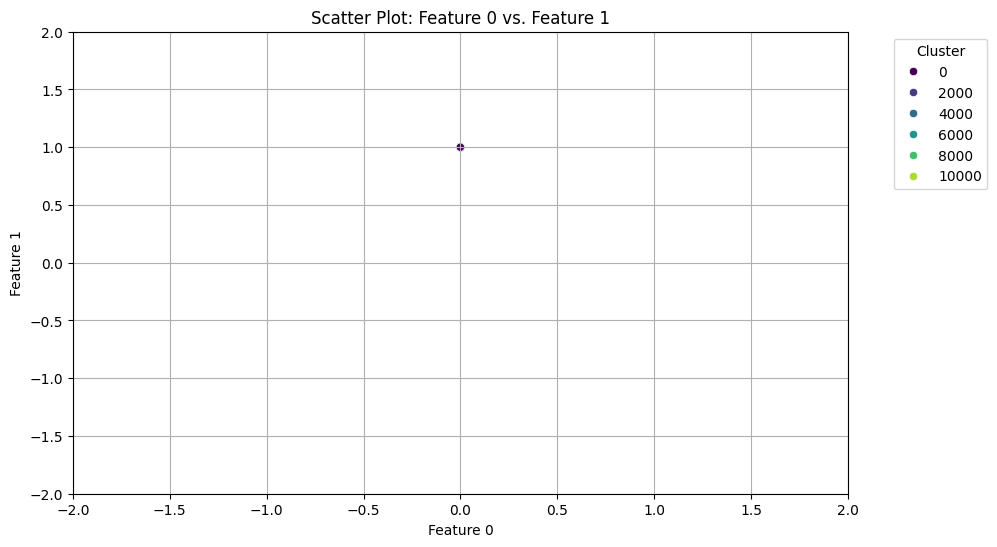

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select feature columns for visualization, e.g., feature 0 and feature 1
x_feature = 0
y_feature = 1

# Create a scatter plot with cluster coloring
plt.figure(figsize=(10, 6))
sns.scatterplot(data=DBSCAN_dataset, x=x_feature, y=y_feature, hue='Cluster', palette='viridis')
plt.title(f'Scatter Plot: Feature {x_feature} vs. Feature {y_feature}')
plt.xlim(-2, 2)  # Limit the x-axis to -2 to 2
plt.ylim(-2, 2) 
plt.xlabel(f'Feature {x_feature}')
plt.ylabel(f'Feature {y_feature}') 
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
